In [1]:
import pandas as pd

## Trying to fix imbalance

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

In [206]:
df2 = pd.read_csv("../data/processed/processed_data.csv")

In [207]:
df2['mental_disorder'].value_counts()

depression      153
None            153
stress          153
Panic attack     75
Name: mental_disorder, dtype: int64

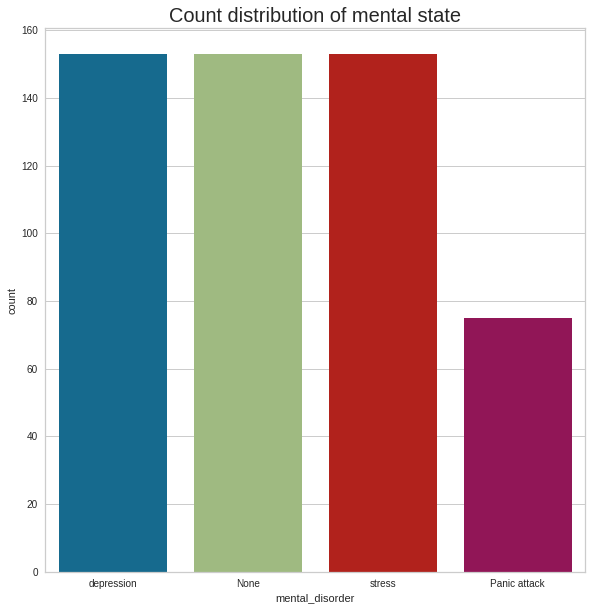

In [210]:
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="mental_disorder", data=df2)
plt.title("Count distribution of mental state", size=20)
#plt.subplot(122)
labels=[0,1]
#plt.pie(df2["mental_disorder"].value_counts().values,autopct="%1.1f%%",labels=labels,colors=["lime","red"])
plt.show()

In [133]:
#first lets try to resample "None"

In [134]:
target1=df2[df2['mental_disorder']=="None"]
target0=df2[df2['mental_disorder']=="depression"]

In [135]:
target1=resample(target1,replace=True,n_samples=len(target0),random_state=40)

In [139]:
target2=df2[df2['mental_disorder']=="stress"]

In [140]:
target2 = resample(target2,replace=True,n_samples=len(target0),random_state=40)

In [146]:
target3 = df2[df2['mental_disorder']=="Panic attack"]

In [147]:
target3['mental_disorder'].value_counts()

Panic attack    16
Name: mental_disorder, dtype: int64

In [148]:
target3 = resample(target3,replace=True,n_samples=75,random_state=40)

In [149]:
target=pd.concat([target0,target1,target2,target3])

In [150]:
target['mental_disorder'].value_counts()

depression      153
None            153
stress          153
Panic attack     75
Name: mental_disorder, dtype: int64

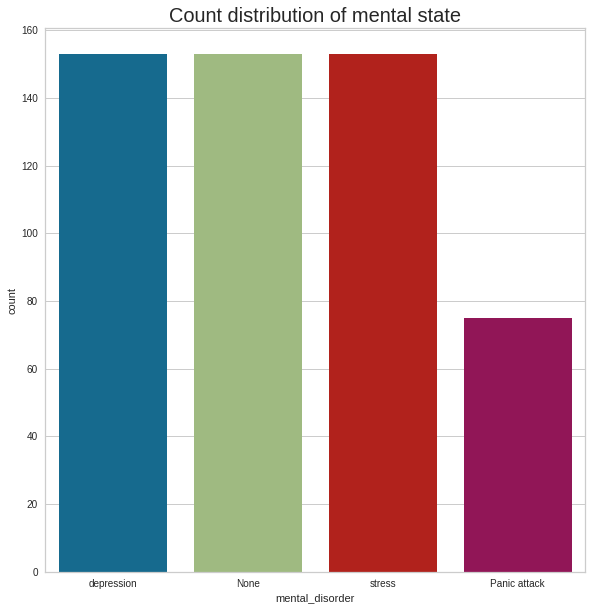

In [153]:
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="mental_disorder", data=target)
plt.title("Count distribution of mental state", size=20)
#plt.subplot(122)
labels=[0,1]
#plt.pie(df2["mental_disorder"].value_counts().values,autopct="%1.1f%%",labels=labels,colors=["lime","red"])
plt.show()

In [154]:
df3 = target.copy()

In [155]:
s3 = setup(df3, target = 'mental_disorder')

,Description,Value
0,session_id,1869
1,Target,mental_disorder
2,Target Type,Multiclass
3,Label Encoded,"None: 0, Panic attack: 1, depression: 2, stress: 3"
4,Original Data,"(534, 35)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,34
8,Ordinal Features,False
9,High Cardinality Features,False


In [156]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8547,0.9593,0.8675,0.8605,0.8509,0.8031,0.8075,0.1330
et,Extra Trees Classifier,0.8494,0.9626,0.8617,0.8574,0.8477,0.7953,0.7990,0.1080
catboost,CatBoost Classifier,0.8414,0.9632,0.8543,0.8480,0.8369,0.7848,0.7897,6.4890
gbc,Gradient Boosting Classifier,0.8413,0.9475,0.8549,0.8496,0.8374,0.7845,0.7895,0.2080
lr,Logistic Regression,0.8386,0.9172,0.8511,0.8436,0.8340,0.7815,0.7857,0.5780
lightgbm,Light Gradient Boosting Machine,0.8307,0.9485,0.8447,0.8362,0.8255,0.7700,0.7751,0.0580
svm,SVM - Linear Kernel,0.8227,0.0000,0.8364,0.8280,0.8182,0.7608,0.7650,0.0110
dt,Decision Tree Classifier,0.8090,0.8712,0.8286,0.8128,0.8030,0.7420,0.7471,0.0080
lda,Linear Discriminant Analysis,0.7878,0.9166,0.7965,0.7902,0.7777,0.7124,0.7191,0.0130
ridge,Ridge Classifier,0.7876,0.0000,0.8003,0.7981,0.7765,0.7121,0.7206,0.0070


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1869, verbose=0,
                       warm_start=False)

In [159]:
rf2 = create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9474,0.9932,0.9500,0.9549,0.9465,0.9283,0.9318
1,0.8684,0.9749,0.8875,0.8864,0.8694,0.8224,0.8278
2,0.9474,0.9950,0.9542,0.9474,0.9474,0.9286,0.9286
3,0.8378,0.9466,0.8625,0.8359,0.8338,0.7784,0.7808
4,0.8919,0.9650,0.9028,0.8917,0.8907,0.8519,0.8527
5,0.7027,0.9102,0.6944,0.6909,0.6904,0.5962,0.6004
6,0.8108,0.9456,0.8403,0.8149,0.8060,0.7451,0.7502
7,0.9730,0.9631,0.9722,0.9751,0.9727,0.9632,0.9642
8,0.8108,0.9677,0.8472,0.8587,0.8002,0.7481,0.7683


In [160]:
predict_model(rf2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8758,0.9787,0.8752,0.8739,0.8711,0.8229,0.8252


,gender_Female,age_13-19,age_20-26,age_27-33,age_34-44,age_45 or more,education_College,education_Professional,education_School,education_Unemployed,...,thoughts_time_morning,thoughts_time_night,voices_no,harming_others_yes,suicide_no,suicidal_thoughts_yes,therapy_yes,mental_disorder,Label,Score
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,stress,stress,0.94
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,stress,stress,0.73
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,stress,stress,0.95
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,stress,stress,0.73
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,stress,stress,0.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,depression,depression,0.54
157,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,None,None,0.98
158,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,stress,stress,0.40
159,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,None,None,0.89


In [166]:
rf2

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1869, verbose=0,
                       warm_start=False)

In [161]:
tuned_rf2 = tune_model(rf2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7895,0.9752,0.7542,0.8156,0.7782,0.7105,0.7239
1,0.7895,0.9465,0.7958,0.7964,0.7830,0.7143,0.7204
2,0.8947,0.9880,0.9125,0.8956,0.8916,0.8582,0.8606
3,0.7568,0.9241,0.7917,0.7566,0.7464,0.6683,0.6764
4,0.8649,0.9438,0.8801,0.8705,0.8667,0.8152,0.8160
5,0.7568,0.8969,0.7431,0.7706,0.7537,0.6677,0.6724
6,0.7027,0.8919,0.7500,0.6822,0.6779,0.6025,0.6127
7,0.9730,0.9671,0.9722,0.9751,0.9727,0.9632,0.9642
8,0.6757,0.9154,0.7014,0.7031,0.6690,0.5634,0.5759


In [162]:
ensemble_rf2 = ensemble_model(rf2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8947,0.9923,0.9000,0.9110,0.8860,0.8566,0.8665
1,0.8421,0.9609,0.8417,0.8611,0.8457,0.7853,0.7898
2,0.9211,0.9940,0.9333,0.9224,0.9203,0.8935,0.8943
3,0.7568,0.9415,0.7958,0.7529,0.7448,0.6706,0.6773
4,0.8649,0.9634,0.8819,0.8698,0.8641,0.8154,0.8178
5,0.7568,0.9094,0.7431,0.7706,0.7537,0.6677,0.6724
6,0.8378,0.9395,0.8611,0.8467,0.8386,0.7811,0.7842
7,0.9730,0.9671,0.9722,0.9751,0.9727,0.9632,0.9642
8,0.7297,0.9376,0.7708,0.7561,0.7146,0.6397,0.6557


In [163]:
predict_model(ensemble_rf2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8696,0.9729,0.8743,0.8656,0.8660,0.8149,0.8160


,gender_Female,age_13-19,age_20-26,age_27-33,age_34-44,age_45 or more,education_College,education_Professional,education_School,education_Unemployed,...,thoughts_time_morning,thoughts_time_night,voices_no,harming_others_yes,suicide_no,suicidal_thoughts_yes,therapy_yes,mental_disorder,Label,Score
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,stress,stress,0.8030
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,stress,stress,0.6770
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,stress,stress,0.8360
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,stress,stress,0.5950
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,stress,stress,0.5780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,depression,depression,0.4780
157,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,None,None,0.9200
158,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,stress,stress,0.4240
159,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,None,None,0.7110


In [167]:
final_rf = finalize_model(rf2)

In [175]:
data_unseen = df2.iloc[[1]]

In [180]:
unseen_predictions = predict_model(final_rf, data=data_unseen)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0,0,0,0,0,0,0


In [197]:
unseen_predictions.Label

1    depression
Name: Label, dtype: object

In [184]:
save_model(final_rf,'../artifacts/pycaretModels/finalRFmodel_20APR2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='mental_disorder',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nume...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
       